In [9]:
import os, math, pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cmap = plt.get_cmap("tab20c")
sns.set(font_scale=1)
pd.set_option('display.max_columns', 50)
sns.set_style("white")

### pre-process of conformation data of IDR from coarse-grained MD simulations
1. please download the data from https://zenodo.org/records/10198621  
2. remove sequences with normalized Rg < 1  
3. remove sequences with homologs in SeqDance training set  
4. sequence clustering using MMseq (sequence identity 20%, coverage 50%), split train and test based on sequence clustering  
5. we provide the final file in data folder

In [ ]:
re_train = pd.read_csv('training/scaled_re_bio_synth_training_data_cleaned_05_09_2023.tsv', header=None)
re_test = pd.read_csv('test/scaled_re_nat_meth_test.tsv', header=None)
re_all = pd.concat([re_train, re_test])
re_all = re_all[re_all[0].str.contains('\t')][0].str.split('\t', expand=True).reset_index(drop=True)

rg_train = pd.read_csv('training/scaled_rg_bio_synth_training_data_cleaned_05_09_2023.tsv', header=None)
rg_test = pd.read_csv('test/scaled_rg_nat_meth_test.tsv', header=None)
rg_all = pd.concat([rg_train, rg_test])
rg_all = rg_all[0].str.split('\t', expand=True).reset_index(drop=True)

asph_train = pd.read_csv('training/asph_bio_synth_training_data_cleaned_05_09_2023.tsv', header=None)
asph_test = pd.read_csv('test/asph_nat_meth_test.tsv', header=None)
asph_all = pd.concat([asph_train, asph_test])
asph_all = asph_all[0].str.split(' ', expand=True).reset_index(drop=True)

In [5]:
idr = pd.merge(rg_all, re_all[[0,2]], on=0, how='outer')
idr = pd.merge(idr, asph_all[[0,2]], on=0, how='outer')
idr.columns = ['name', 'seq', 'rg','re','asphericity']
idr['len'] = idr['seq'].apply(len)
for i in ['re','rg','asphericity']:
    idr[i] = idr[i].astype(float)

#### filtering based on scaled Rg
there are about half of proteins have very small scaled Rg, they are too compact to be real disorder, we remove them in our analysis

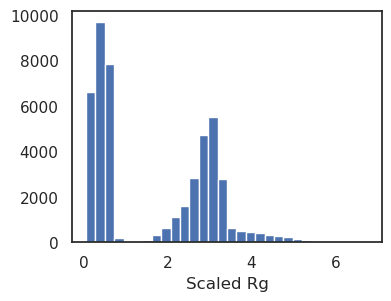

In [6]:
plt.figure(figsize=[4,3])
plt.hist(idr['rg'], bins=30)
plt.xlabel('Scaled Rg')
plt.show()

### pre-process of Rg of ordered PDB structures
1. download the data from https://pmc.ncbi.nlm.nih.gov/articles/PMC5053138/#sec11  
2. download PDB structures, get the sequence.  
3. sequence clustering using MMseq (sequence identity 20%, coverage 50%), split train and test based on sequence clustering  
4. normalize Rg = Rg / pow(length, 0.4)
5. we provide the final file in data folder

### get embedding using SeqDance (using IDR as an example)

In [10]:

df = pd.read_csv('../data/idr_rg_re_asph_cluster.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/idr_rg_re_asph_cluster.csv'

### train linear regression models (using Rg of IDR as an example)